# ANN Classification - Bank Customer Retention
## Part 2 - ANN TRAINING
In this notebook, we load the preprocessed training and testing dataset files and train ANN models.

> **INPUT:** the preprocessed training and testing dataset files.<br>
> **OUTPUT:** the trained ANN models.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
import tensorflow as ts
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Check tensorflow version
ts.__version__

'2.16.1'

### 2. LOADING DATASET FILES

In [3]:
# Prepare file location and load dataset
data_file_location = "..\\data\\interim\\"
data_train_file_name = "churn_modelling_preprocessed_train"
data_test_file_name = "churn_modelling_preprocessed_test"
data_file_ext = "csv"

data_train = pd.read_csv(data_file_location + data_train_file_name + "." + data_file_ext)
data_test = pd.read_csv(data_file_location + data_test_file_name + "." + data_file_ext)

In [4]:
# Check training dataset head
data_train.head()

,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,0.0
1,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,0.0
2,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,0.0
3,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,0.0
4,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,0.0


In [5]:
# Check testing dataset head
data_test.head()

,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.754865,-0.573694,-0.552043,-1.091687,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,0.0
1,-0.569844,-0.573694,-1.314903,-1.091687,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,1.0
2,-0.569844,1.743090,0.571630,-1.091687,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,0.0
3,-0.569844,-0.573694,1.416961,0.916013,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,0.0
4,1.754865,-0.573694,0.571630,0.916013,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,0.0


In [6]:
# Split dataset files into independent and dependent features
X_train = data_train.iloc[:,0:-1]
y_train = data_train.iloc[:,-1].values.reshape(-1,1)
X_test = data_test.iloc[:,0:-1]
y_test = data_test.iloc[:,-1].values

### 2. BUILDING ANN MODEL

In [7]:
# Initialize the ANN
ann = ts.keras.models.Sequential()

In [8]:
# Add the input layer and the first hidden layer
ann.add(ts.keras.layers.Dense(units=6, activation="relu"))

In [9]:
# Add the second hidden layer
ann.add(ts.keras.layers.Dense(units=6, activation="relu"))

In [10]:
# Add the output layer
ann.add(ts.keras.layers.Dense(units=1, activation="sigmoid"))

### 3. TRAINING ANN MODEL

In [11]:
# Compiling the ANN
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy","recall","precision","f1_score"])

In [12]:
# Training the model
history = ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.5696 - f1_score: 0.3378 - loss: 0.6815 - precision: 0.2401 - recall: 0.5102
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - f1_score: 0.3312 - loss: 0.4839 - precision: 0.7212 - recall: 0.0030
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - f1_score: 0.3218 - loss: 0.4361 - precision: 0.6923 - recall: 0.0424
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8065 - f1_score: 0.3423 - loss: 0.4347 - precision: 0.6193 - recall: 0.1668
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - f1_score: 0.3401 - loss: 0.4311 - precision: 0.5737 - recall: 0.2372
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - f1_score: 0.3446 - loss: 0.4245 - precision: 0.5936 - recall: 0.2825
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8174 - f1_score: 0.3386 - loss: 0.4097 - precision: 0.6065 - recall: 0.

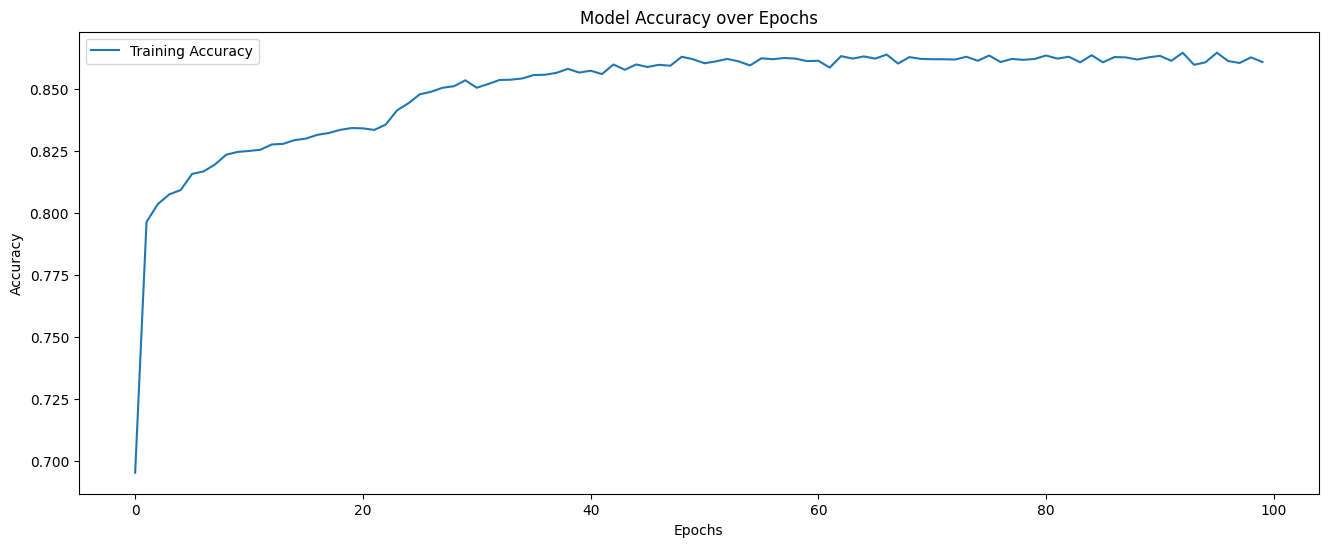

In [13]:
# Plot the training accuracy
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()

### 4. EVALUATION

In [14]:
# Predicting the testing samples
y_pred = ann.predict(X_test)

# Converting probabilities into predictions
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Calculate performance metrics
results = pd.DataFrame(index=["ANN Base"], columns=["Accuracy", "Recall", "Precision", "F1"])
results.iloc[0] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [16]:
# Print results
results

,Accuracy,Recall,Precision,F1
ANN Base,0.8535,0.501235,0.690476,0.58083


These metrics indicate that while the model has a high accuracy, it has relatively lower recall, precision, and F1 score, suggesting potential room for improvement, particularly in correctly identifying positive instances (recall) and in the balance between precision and recall (F1 score).